### Import Libraires

In [32]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import re
%matplotlib inline

### Import Dataset

In [33]:
#reading files
resumeData = pd.read_csv(r'./ResumeData/Resume.csv', index_col = 0 , engine='python')

print(resumeData.columns)
resumeData.shape

Index(['Resume_str', 'Resume_html', 'Category'], dtype='object')


(2484, 3)

### Data visualization

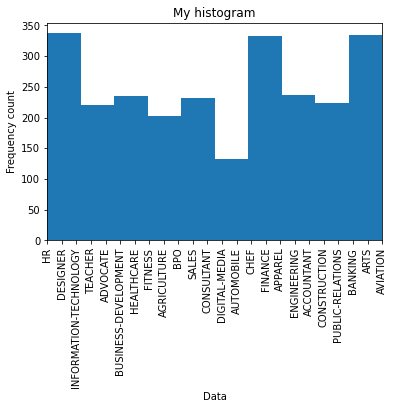

In [34]:
#Histogram
plt.xticks(rotation = 90)
plt.xlim([0, 23])
plt.hist(resumeData['Category'])
plt.ylabel('Frequency count')
plt.xlabel('Data');
plt.title('My histogram')
plt.show()

### Dropping Rows/Columns

In [35]:
#Drop null rows
resumeData = resumeData.dropna()

columnDrop = ['Resume_html']

resumeData.drop(columnDrop, axis=1, inplace=True)

resumeData


,Resume_str,Category
ID,,
16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
22323967,"HR SPECIALIST, US HR OPERATIONS ...",HR
33176873,HR DIRECTOR Summary Over 2...,HR
27018550,HR SPECIALIST Summary Dedica...,HR
17812897,HR MANAGER Skill Highlights ...,HR
...,...,...
99416532,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,AVIATION
24589765,"GOVERNMENT RELATIONS, COMMUNICATIONS ...",AVIATION
31605080,GEEK SQUAD AGENT Professional...,AVIATION


### Combing Job Categories

BUSINESSDEVELOPMENT      120
INFORMATIONTECHNOLOGY    120
ACCOUNTANT               118
CHEF                     118
ADVOCATE                 118
FINANCE                  118
ENGINEERING              118
AVIATION                 117
FITNESS                  117
SALES                    116
BANKING                  115
HEALTHCARE               115
CONSULTANT               115
CONSTRUCTION             112
PUBLICRELATIONS          111
HR                       110
DESIGNER                 107
ARTS                     103
TEACHER                  102
APPAREL                   97
DIGITALMEDIA              96
AGRICULTURE               63
AUTOMOBILE                36
BPO                       22
Name: Category, dtype: int64


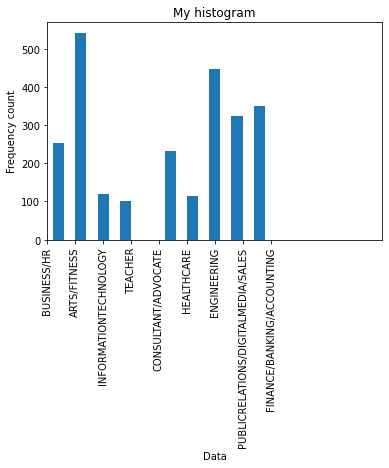

ARTS/FITNESS                          542
ENGINEERING                           446
FINANCE/BANKING/ACCOUNTING            351
PUBLICRELATIONS/DIGITALMEDIA/SALES    323
BUSINESS/HR                           252
CONSULTANT/ADVOCATE                   233
INFORMATIONTECHNOLOGY                 120
HEALTHCARE                            115
TEACHER                               102
Name: Category, dtype: int64

In [36]:
resumeData['Category'] = resumeData['Category'].apply(lambda x: re.sub(r'[\W\s_-]', '', x.upper()))

print(resumeData.Category.value_counts())

#Combining Categories to reduce number of classes
resumeData['Category'] = resumeData['Category'].replace(['FINANCE','BANKING', 'ACCOUNTING','ACCOUNTANT'],'FINANCE/BANKING/ACCOUNTING')
resumeData['Category'] = resumeData['Category'].replace(['ARTS','DESIGNER', 'APPAREL','FITNESS', 'CHEF'],'ARTS/FITNESS')
resumeData['Category'] = resumeData['Category'].replace(['BUSINESSDEVELOPMENT','HR', 'BPO'],'BUSINESS/HR')
resumeData['Category'] = resumeData['Category'].replace(['AUTOMOBILE','ENGINEERING', 'CONSTRUCTION', 'AVIATION', 'AGRICULTURE'],'ENGINEERING')
resumeData['Category'] = resumeData['Category'].replace(['PUBLICRELATIONS','DIGITALMEDIA', 'SALES'],'PUBLICRELATIONS/DIGITALMEDIA/SALES')
resumeData['Category'] = resumeData['Category'].replace(['CONSULTANT','ADVOCATE'],'CONSULTANT/ADVOCATE')


#New Histogram
plt.xticks(rotation = 90)
plt.xlim([0, 12])
plt.hist(resumeData['Category'],
         rwidth = 0.5)
plt.ylabel('Frequency count')
plt.xlabel('Data');
plt.title('My histogram')
plt.show()

resumeData.Category.value_counts()

### Stemmer

In [37]:
nltk.download('stopwords')

#initialize objs
stemmer = SnowballStemmer("english")
stop = stopwords.words('english')

def stemStopResume(df):
    #remove excess symbols
    df = df.replace(r'[^\w\s]|_', '', regex=True)
    
    #remove stopwords
    df['stopColumn'] = df['Resume_str'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    
    #split and stem column
    df['stopColumn'] = df['stopColumn'].str.split()
    df['stopColumn'] = df['stopColumn'].apply(lambda x: ' '.join([stemmer.stem(y) for y in x]))
    
    #return modified df
    return df

resumeData = stemStopResume(resumeData)
resumeData

[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Resume_str,Category,stopColumn
ID,,,
16852973,HR ADMINISTRATORMARKETING ASSOCIATE\n...,BUSINESSHR,hr administratormarket associ hr administr sum...
22323967,HR SPECIALIST US HR OPERATIONS ...,BUSINESSHR,hr specialist us hr oper summari versatil medi...
33176873,HR DIRECTOR Summary Over 2...,BUSINESSHR,hr director summari over 20 year experi recrui...
27018550,HR SPECIALIST Summary Dedica...,BUSINESSHR,hr specialist summari dedic driven dynam 20 ye...
17812897,HR MANAGER Skill Highlights ...,BUSINESSHR,hr manag skill highlight hr skill hr depart st...
...,...,...,...
99416532,RANK SGTE5 NON COMMISSIONED OFFICER I...,ENGINEERING,rank sgte5 non commiss offic in charg brigad m...
24589765,GOVERNMENT RELATIONS COMMUNICATIONS A...,ENGINEERING,govern relat communic and organiz develop dire...
31605080,GEEK SQUAD AGENT Professional...,ENGINEERING,geek squad agent profession profil it support ...


### Vectorization

In [38]:
import pickle
label_encoder = None
def resume_vectorizer(data,labels ,m = 1.0 , n = 2) :
    global label_encoder
    label_encoder = preprocessing.LabelEncoder()
    # vectorizing the lables i.e To numerical values using label_encoder
    
    labels = label_encoder.fit_transform(labels)
    print((label_encoder.classes_))
  
    # Now vectorizing the data i.e. Creating features based on data
    cv = CountVectorizer(max_df = m , min_df = n )
    data_cv = cv.fit_transform(data)
    data_cv_array = data_cv.toarray()
    
    feature_names =cv.get_feature_names_out()
    print('Feature Count: ', len(feature_names))
    
    dataframe = pd.DataFrame(data_cv_array, columns = feature_names)
    pickle.dump(cv, open('vectorizer', 'wb'))
    return dataframe , labels

vectorDataFrame , resumeData['Category'] = resume_vectorizer(resumeData['stopColumn'], resumeData['Category'])

print(vectorDataFrame.columns)
vectorDataFrame

['ARTSFITNESS' 'BUSINESSHR' 'CONSULTANTADVOCATE' 'ENGINEERING'
 'FINANCEBANKINGACCOUNTING' 'HEALTHCARE' 'INFORMATIONTECHNOLOGY'
 'PUBLICRELATIONSDIGITALMEDIASALES' 'TEACHER']
Feature Count:  16272
Index(['00', '000', '003', '01', '011977', '011979', '011980', '011981',
       '011982', '011983',
       ...
       'âœpublish', 'âœteam', 'âœthank', 'âœthe', 'âœtop', 'âœwhat', 'âž',
       'âˆ', 'ï¼', 'ï½â'],
      dtype='object', length=16272)


,00,000,003,01,011977,011979,011980,011981,011982,011983,...,âœpublish,âœteam,âœthank,âœthe,âœtop,âœwhat,âž,âˆ,ï¼,ï½â
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2479,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2480,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2481,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2482,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6,0


# Models

In [24]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

x = vectorDataFrame
y = resumeData['Category']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 5 , stratify = y) 

xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train,y_train)



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [25]:
predictions = xgb_classifier.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score
print("Accuracy of Model::",accuracy_score(y_test,predictions))

Accuracy of Model:: 0.7484909456740443


In [27]:
# import pickle
# filename = "xgb_model"

# pickle.dump(xgb_classifier , open(filename , 'wb'))

xgb_classifier.save_model("model.txt")


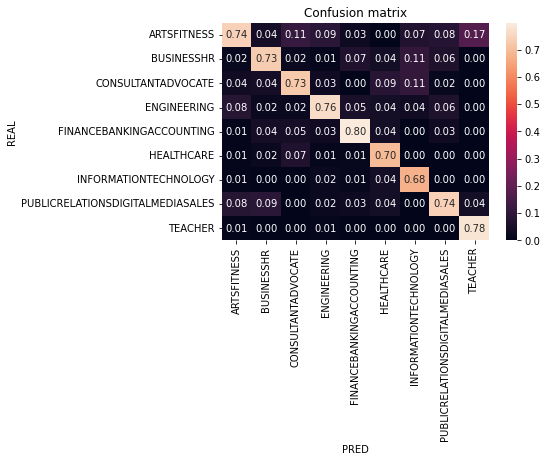

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
labels = resumeData['Category'].unique()
confusionMatrix = confusion_matrix(
    label_encoder.inverse_transform(y_test),
    label_encoder.inverse_transform(predictions) , 
    labels=label_encoder.classes_, 
    normalize='pred'
)
heatMapData = pd.DataFrame(confusionMatrix , index=label_encoder.classes_, columns=label_encoder.classes_, )

sns.heatmap(heatMapData, annot = True, fmt = '.2f')
plt.title('Confusion matrix')
plt.xlabel('PRED')
plt.ylabel('REAL')

plt.show()